In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt                                                 # 실제로 그래프를 그려주는 애
import seaborn as sns

import matplotlib.font_manager as fm                                            # 한글폰트 안깨져서 나오게하기위해
font_name = fm.FontProperties(fname="C:\Windows/Fonts/malgun.ttf").get_name()    # 폰트 지정
plt.rc('font', family=font_name)                                                 # matplotlib내에 폰트 설정

mpl.rcParams["axes.unicode_minus"] = False        # 음수 설정, False로 지정하면 음수를 문자로 쓰지않고 숫자로 지정하겠다는 의미, 음수로 사용이 가능해진다.

# 서울시 범죄현황 분석

    http://data.go.kr
    구글에서 "서울시 관서별 5대범죄 발생검거 현황" 검색
    
    쌤이 보내주신 'crime_in_seoul.csv' 다운

## 1) 데이터 수집 및 전처리

In [8]:
# 2015년 데이터 수집

crime_anal_police = pd.read_csv("data/seoul/crime_in_seoul.csv", encoding="euc-kr", thousands=",") 
     # euc-kr이라는 확장자여서 사용할수있게끔 해주기 / thousands : 천단위마다 , 찍혀있는것은 숫자로 사용해라
crime_anal_police.head()

,관서명,살인 발생,살인 검거,강도 발생,강도 검거,강간 발생,강간 검거,절도 발생,절도 검거,폭력 발생,폭력 검거
0,중부서,2,2,3,2,105,65,1395,477,1355,1170
1,종로서,3,3,6,5,115,98,1070,413,1278,1070
2,남대문서,1,0,6,4,65,46,1153,382,869,794
3,서대문서,2,2,5,4,154,124,1812,738,2056,1711
4,혜화서,3,2,5,4,96,63,1114,424,1015,861


In [110]:
# 관서명을 구 이름으로 변경
# https://ko.wikipedia.org/wiki/서울특별시지방경찰청

"""
GoogleMap API를 이용하여 주소 획득(Open API 활용 : 기능을 다른곳에서 끌어와서 사용하기)

    - http://developers.google.com
      들어가서 아래 보면 Google API Console 들어가기
      로그인해서 들어가기
      프로젝트 선택 클릭 - 새프로젝트 - seul project1이라고 이름 지어줌 - +API 및 서비스 사용 설정 - 지도 - geocoding API - 사용설정 - 사용자인증정보 - API 및 사용자 인증정보 - 사용자인증정보만들기:API
    - https://cloud.google.com/maps-platform/?hl=ko
      시작하기 - 장소 - 계속 - 프로젝트 만든거 선택 - 카드 등록 - 끝
    - 도스창에 'pip install googlemaps' 설치하기
"""


"\nGoogleMap API를 이용하여 주소 획득(Open API 활용 : 기능을 다른곳에서 끌어와서 사용하기)\n\n    - http://developers.google.com\n      들어가서 아래 보면 Google API Console 들어가기\n      로그인해서 들어가기\n      프로젝트 선택 클릭 - 새프로젝트 - seul project1이라고 이름 지어줌 - +API 및 서비스 사용 설정 - 지도 - geocoding API - 사용설정 - 사용자인증정보 - API 및 사용자 인증정보 - 사용자인증정보만들기:API\n    - https://cloud.google.com/maps-platform/?hl=ko\n      시작하기 - 장소 - 계속 - 프로젝트 만든거 선택 - 카드 등록 - 끝\n    - 도스창에 'pip install googlemaps' 설치하기\n"

In [9]:
import googlemaps

In [10]:
g_key = "유희씨꺼 입력하세요:)"
gmap = googlemaps.Client(key=g_key)
gmap

In [11]:
gmap.geocode("서울중부경찰서", language="ko")            # jason형식 / 현재는 formatted_address, geometry 키값 필요하다

[{'address_components': [{'long_name': '２７',
    'short_name': '２７',
    'types': ['premise']},
   {'long_name': '수표로',
    'short_name': '수표로',
    'types': ['political', 'sublocality', 'sublocality_level_4']},
   {'long_name': '을지로동',
    'short_name': '을지로동',
    'types': ['political', 'sublocality', 'sublocality_level_2']},
   {'long_name': '중구',
    'short_name': '중구',
    'types': ['political', 'sublocality', 'sublocality_level_1']},
   {'long_name': '서울특별시',
    'short_name': '서울특별시',
    'types': ['administrative_area_level_1', 'political']},
   {'long_name': '대한민국',
    'short_name': 'KR',
    'types': ['country', 'political']},
   {'long_name': '100-032',
    'short_name': '100-032',
    'types': ['postal_code']}],
  'formatted_address': '대한민국 서울특별시 중구 을지로동 수표로 27',
  'geometry': {'location': {'lat': 37.5636465, 'lng': 126.9895796},
   'location_type': 'ROOFTOP',
   'viewport': {'northeast': {'lat': 37.56499548029149,
     'lng': 126.9909285802915},
    'southwest': {'lat': 3

In [12]:
# 경찰서 이름을 완전한 이름으로 변경

station_name = []
for name in crime_anal_police["관서명"]:
    station_name.append("서울" + str(name[:-1] + "경찰서"))   # name[:-1] : ex)'중부서'에서 '서'는 빼고 가져오자
    
print(station_name)

['서울중부경찰서', '서울종로경찰서', '서울남대문경찰서', '서울서대문경찰서', '서울혜화경찰서', '서울용산경찰서', '서울성북경찰서', '서울동대문경찰서', '서울마포경찰서', '서울영등포경찰서', '서울성동경찰서', '서울동작경찰서', '서울광진경찰서', '서울서부경찰서', '서울강북경찰서', '서울금천경찰서', '서울중랑경찰서', '서울강남경찰서', '서울관악경찰서', '서울강서경찰서', '서울강동경찰서', '서울종암경찰서', '서울구로경찰서', '서울서초경찰서', '서울양천경찰서', '서울송파경찰서', '서울노원경찰서', '서울방배경찰서', '서울은평경찰서', '서울도봉경찰서', '서울수서경찰서']


In [13]:
station_address = []
station_lat = []   # 위도
station_lng = []   # 경도

for name in station_name:    # name이라는 변수에 station_name 순서대로 전달될것
    tmp = gmap.geocode(name, language="ko")   # 구글에게 전달해주기
    
    station_address.append(tmp[0].get("formatted_address")) # 주소
    
    tmp_loc = tmp[0].get("geometry")
    station_lat.append(tmp_loc["location"]["lat"]) # 위도
    station_lng.append(tmp_loc["location"]["lng"]) # 경도
    
    print(name + "---->" + tmp[0].get("formatted_address"))
    

서울중부경찰서---->대한민국 서울특별시 중구 을지로동 수표로 27
서울종로경찰서---->대한민국 서울특별시 종로구 종로1.2.3.4가동 율곡로 46
서울남대문경찰서---->대한민국 서울특별시 중구 회현동 한강대로 410
서울서대문경찰서---->대한민국 서울특별시 서대문구 충현동 통일로 113
서울혜화경찰서---->대한민국 서울특별시 종로구 인의동 창경궁로 112-16
서울용산경찰서---->대한민국 서울특별시 용산구 원효로1가 백범로 329
서울성북경찰서---->대한민국 서울특별시 성북구 삼선동5가 301
서울동대문경찰서---->대한민국 서울특별시 동대문구 청량리동 약령시로21길 29
서울마포경찰서---->대한민국 서울특별시 마포구 아현동 마포대로 183
서울영등포경찰서---->대한민국 서울특별시 영등포구 영등포동1가 618-7
서울성동경찰서---->대한민국 서울특별시 성동구 행당동 왕십리광장로 9
서울동작경찰서---->대한민국 서울특별시 동작구 노량진1동 노량진로 148
서울광진경찰서---->대한민국 서울특별시 광진구 구의동 자양로 167
서울서부경찰서---->대한민국 서울특별시 은평구 대조동 통일로 757
서울강북경찰서---->대한민국 서울특별시 강북구 번1동 오패산로 406
서울금천경찰서---->대한민국 서울특별시 금천구 시흥동 190
서울중랑경찰서---->대한민국 서울특별시 중랑구 신내1동 신내역로3길 40-10
서울강남경찰서---->대한민국 서울특별시 강남구 대치동 998
서울관악경찰서---->대한민국 서울특별시 관악구 봉천동
서울강서경찰서---->대한민국 서울특별시 양천구 신월동 화곡로 73
서울강동경찰서---->대한민국 서울특별시 강동구 성내1동 성내로 57
서울종암경찰서---->대한민국 서울특별시 성북구 종암동 종암로 135
서울구로경찰서---->대한민국 서울특별시 구로구 구로동 가마산로 235
서울서초경찰서---->대한민국 서울특별시 서초구 서초3동 반포대로 179
서울양천경찰서---->대한민국 서울특별시 양천구 신정6동 목동동로 99
서울송파

In [14]:
print(station_address)
print(station_lat)
print(station_lng)

['대한민국 서울특별시 중구 을지로동 수표로 27', '대한민국 서울특별시 종로구 종로1.2.3.4가동 율곡로 46', '대한민국 서울특별시 중구 회현동 한강대로 410', '대한민국 서울특별시 서대문구 충현동 통일로 113', '대한민국 서울특별시 종로구 인의동 창경궁로 112-16', '대한민국 서울특별시 용산구 원효로1가 백범로 329', '대한민국 서울특별시 성북구 삼선동5가 301', '대한민국 서울특별시 동대문구 청량리동 약령시로21길 29', '대한민국 서울특별시 마포구 아현동 마포대로 183', '대한민국 서울특별시 영등포구 영등포동1가 618-7', '대한민국 서울특별시 성동구 행당동 왕십리광장로 9', '대한민국 서울특별시 동작구 노량진1동 노량진로 148', '대한민국 서울특별시 광진구 구의동 자양로 167', '대한민국 서울특별시 은평구 대조동 통일로 757', '대한민국 서울특별시 강북구 번1동 오패산로 406', '대한민국 서울특별시 금천구 시흥동 190', '대한민국 서울특별시 중랑구 신내1동 신내역로3길 40-10', '대한민국 서울특별시 강남구 대치동 998', '대한민국 서울특별시 관악구 봉천동', '대한민국 서울특별시 양천구 신월동 화곡로 73', '대한민국 서울특별시 강동구 성내1동 성내로 57', '대한민국 서울특별시 성북구 종암동 종암로 135', '대한민국 서울특별시 구로구 구로동 가마산로 235', '대한민국 서울특별시 서초구 서초3동 반포대로 179', '대한민국 서울특별시 양천구 신정6동 목동동로 99', '대한민국 서울특별시 송파구 가락본동 9', '대한민국 서울특별시 노원구 하계동 노원로 283', '대한민국 서울특별시 서초구 방배본동 동작대로 204', '대한민국 서울특별시 은평구 불광동 연서로 365', '대한민국 서울특별시 도봉구 창4동 노해로 403', '대한민국 서울특별시 강남구 개포동 개포로 617']
[37.5636465, 37.5755578, 37.5547584, 37.5647848, 37.571

In [15]:
# 받은 주소에서 구 이름만 추출
gu_name = []
for name in station_address:
    tmp = name.split()  # 이름 공백에 따라 나눠주기
#     print(tmp)
    
    tmp_gu = [gu for gu in tmp if gu[-1]=="구"][0]  # 끝에가 '구'로 끝나는것만 골라온다 / [0]: 리스트 상태말고 안에 내용만 뽑아오도록
    print(tmp_gu)
    gu_name.append(tmp_gu)
    
print(gu_name)

중구
종로구
중구
서대문구
종로구
용산구
성북구
동대문구
마포구
영등포구
성동구
동작구
광진구
은평구
강북구
금천구
중랑구
강남구
관악구
양천구
강동구
성북구
구로구
서초구
양천구
송파구
노원구
서초구
은평구
도봉구
강남구
['중구', '종로구', '중구', '서대문구', '종로구', '용산구', '성북구', '동대문구', '마포구', '영등포구', '성동구', '동작구', '광진구', '은평구', '강북구', '금천구', '중랑구', '강남구', '관악구', '양천구', '강동구', '성북구', '구로구', '서초구', '양천구', '송파구', '노원구', '서초구', '은평구', '도봉구', '강남구']


In [16]:
# 테이블에 구별 컬럼을 추가
crime_anal_police["구별"] = gu_name
crime_anal_police.head()

,관서명,살인 발생,살인 검거,강도 발생,강도 검거,강간 발생,강간 검거,절도 발생,절도 검거,폭력 발생,폭력 검거,구별
0,중부서,2,2,3,2,105,65,1395,477,1355,1170,중구
1,종로서,3,3,6,5,115,98,1070,413,1278,1070,종로구
2,남대문서,1,0,6,4,65,46,1153,382,869,794,중구
3,서대문서,2,2,5,4,154,124,1812,738,2056,1711,서대문구
4,혜화서,3,2,5,4,96,63,1114,424,1015,861,종로구


In [17]:
# 지금까지의 과정을 작업파일로 저장
crime_anal_police.to_csv("data/seoul/crime_in_seoul_include_gu_name.csv", encoding="utf-8")

In [120]:
# 여기서부터 다시 작업 시작
crime_anal_raw = pd.read_csv("data/seoul/crime_in_seoul_include_gu_name.csv", index_col=0) # index_col=0 : 따로 인덱스 안붙이고 기존에 있던 column[0]을 인덱스로 사용하겠다.
crime_anal_raw.head()

,관서명,살인 발생,살인 검거,강도 발생,강도 검거,강간 발생,강간 검거,절도 발생,절도 검거,폭력 발생,폭력 검거,구별
0,중부서,2,2,3,2,105,65,1395,477,1355,1170,중구
1,종로서,3,3,6,5,115,98,1070,413,1278,1070,종로구
2,남대문서,1,0,6,4,65,46,1153,382,869,794,중구
3,서대문서,2,2,5,4,154,124,1812,738,2056,1711,서대문구
4,혜화서,3,2,5,4,96,63,1114,424,1015,861,종로구


In [37]:
# 그냥 확인한거
crime_anal_raw[crime_anal_raw["관서명"]=="금천서"]

,관서명,살인 발생,살인 검거,강도 발생,강도 검거,강간 발생,강간 검거,절도 발생,절도 검거,폭력 발생,폭력 검거,구별
15,금천서,3,4,6,6,151,122,1567,888,2054,1776,금천구


In [38]:
# 관서명을 없애고 구별을 인덱스로 설정
# 구별로 구분지을것이니 관서명과 인덱스[0-4]는 필요없음, '구별'을 인덱스로 놔두자
crime_anal = pd.pivot_table(crime_anal_raw, index="구별", aggfunc=np.sum)
crime_anal.head()

,강간 검거,강간 발생,강도 검거,강도 발생,살인 검거,살인 발생,절도 검거,절도 발생,폭력 검거,폭력 발생
구별,,,,,,,,,,
강남구,349,449,18,21,10,13,1650,3850,3705,4284
강동구,123,156,8,6,3,4,789,2366,2248,2712
강북구,126,153,13,14,8,7,618,1434,2348,2649
관악구,221,320,14,12,8,9,827,2706,2642,3298
광진구,220,240,26,14,4,4,1277,3026,2180,2625


In [39]:
# 각 범죄의 검거율을 계산하고 검거건수는 검거율로 대체하고 검거 컬럼은 삭제하기로 한다

# crime_anal["강간검거율"] = crime_anal["강간 검거"]/crime_anal["강간 발생"]*100
# crime_anal["강도검거율"] = crime_anal["강도 검거"]/crime_anal["강도 발생"]*100
# crime_anal["살인검거율"] = crime_anal["살인 검거"]/crime_anal["살인 발생"]*100
# crime_anal["절도검거율"] = crime_anal["절도 검거"]/crime_anal["절도 발생"]*100
# crime_anal["폭력검거율"] = crime_anal["폭력 검거"]/crime_anal["폭력 발생"]*100

# del crime_anal["강간 검거"]
# del crime_anal["강도 검거"]
# del crime_anal["살인 검거"]
# del crime_anal["절도 검거"]
# del crime_anal["폭력 검거"]

crime_anal.head()

,강간 발생,강도 발생,살인 발생,절도 발생,폭력 발생,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율
구별,,,,,,,,,,
강남구,449,21,13,3850,4284,77.728285,85.714286,76.923077,42.857143,86.484594
강동구,156,6,4,2366,2712,78.846154,133.333333,75.000000,33.347422,82.890855
강북구,153,14,7,1434,2649,82.352941,92.857143,114.285714,43.096234,88.637222
관악구,320,12,9,2706,3298,69.062500,116.666667,88.888889,30.561715,80.109157
광진구,240,14,4,3026,2625,91.666667,185.714286,100.000000,42.200925,83.047619


In [40]:
# 검거율 결과값이 100이 넘는 것들은 100으로 맞춰주도록 한다.

con_list = ["강간검거율", "강도검거율", "살인검거율", "절도검거율", "폭력검거율"]

for col in con_list:
    crime_anal.loc[crime_anal[col]>100, col] = 100
    
crime_anal.head()

,강간 발생,강도 발생,살인 발생,절도 발생,폭력 발생,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율
구별,,,,,,,,,,
강남구,449,21,13,3850,4284,77.728285,85.714286,76.923077,42.857143,86.484594
강동구,156,6,4,2366,2712,78.846154,100.000000,75.000000,33.347422,82.890855
강북구,153,14,7,1434,2649,82.352941,92.857143,100.000000,43.096234,88.637222
관악구,320,12,9,2706,3298,69.062500,100.000000,88.888889,30.561715,80.109157
광진구,240,14,4,3026,2625,91.666667,100.000000,100.000000,42.200925,83.047619


In [43]:
# 컬럼 이름에서 "발생"이라는 단어를 삭제

## 방법1

# crime_anal.rename(columns={crime_anal.columns[0] : "강간",
#                            crime_anal.columns[1] : "강도",
#                            crime_anal.columns[2] : "살인",
#                            crime_anal.columns[3] : "절도",
#                            crime_anal.columns[4] : "폭력"}, inplace=True)

## 방법2

# crime_anal.rename(columns={"강간 발생":"강간", 
#                            "강도 발생":"강도", 
#                            "살인 발생":"살인", 
#                            "절도 발생":"절도",
#                            "폭력 발생":"폭력"}, inplace=True)

crime_anal.head()

,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율
구별,,,,,,,,,,
강남구,449,21,13,3850,4284,77.728285,85.714286,76.923077,42.857143,86.484594
강동구,156,6,4,2366,2712,78.846154,100.000000,75.000000,33.347422,82.890855
강북구,153,14,7,1434,2649,82.352941,92.857143,100.000000,43.096234,88.637222
관악구,320,12,9,2706,3298,69.062500,100.000000,88.888889,30.561715,80.109157
광진구,240,14,4,3026,2625,91.666667,100.000000,100.000000,42.200925,83.047619


In [53]:
# Normalization(정규화) : MinMaxScaler()
#                       : 기준을 정해놓고 평가를 일반화시키기

from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()

col = ["강간", "강도", "살인", "절도", "폭력"]
x = crime_anal[col].values    # 컬럼값들 가져오기
x

x_scaled = min_max_scaler.fit_transform(x.astype(float))  # astype(float) : 인자를 받을때 이때 값을 실수로 받아야한다 / 현재는 정수값
x_scaled  # 최대값을 1로 두고 최소값을 0으로 두어 각각의 값들을 퍼센트로 나타낸다.


# 정규화 한 값으로 새롭게 DataFrame 만들기

crime_anal_norm = pd.DataFrame(x_scaled, columns=col, index=crime_anal.index)
crime_anal_norm.head()


# 새로운 df에 col2 붙이기

col2 = ["강간검거율", "강도검거율", "살인검거율", "절도검거율", "폭력검거율"]
crime_anal_norm[col2] = crime_anal[col2]
crime_anal_norm.head()

,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율
구별,,,,,,,,,,
강남구,1.000000,0.941176,0.916667,0.953472,0.661386,77.728285,85.714286,76.923077,42.857143,86.484594
강동구,0.155620,0.058824,0.166667,0.445775,0.289667,78.846154,100.000000,75.000000,33.347422,82.890855
강북구,0.146974,0.529412,0.416667,0.126924,0.274769,82.352941,92.857143,100.000000,43.096234,88.637222
관악구,0.628242,0.411765,0.583333,0.562094,0.428234,69.062500,100.000000,88.888889,30.561715,80.109157
광진구,0.397695,0.529412,0.166667,0.671570,0.269094,91.666667,100.000000,100.000000,42.200925,83.047619


# 2) 분석용 데이터 구축

In [57]:
# 인구수 데이터와 CCTV 데이터를 가져온다 : cctv_result.csv
result_cctv = pd.read_csv("data/seoul/cctv_result.csv", index_col="구별")  # "구별"이라는 컬럼을 인덱스로 지정해서 가져오겠다
result_cctv.head()

# crime_anal_norm에 result_cctv에서 가져오고자하는 컬럼 붙여넣기
crime_anal_norm[["인구수", "CCTV"]] = result_cctv[["인구수", "소계"]]
crime_anal_norm.head()

,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율,인구수,CCTV
구별,,,,,,,,,,,,
강남구,1.000000,0.941176,0.916667,0.953472,0.661386,77.728285,85.714286,76.923077,42.857143,86.484594,557865,3238
강동구,0.155620,0.058824,0.166667,0.445775,0.289667,78.846154,100.000000,75.000000,33.347422,82.890855,438225,1010
강북구,0.146974,0.529412,0.416667,0.126924,0.274769,82.352941,92.857143,100.000000,43.096234,88.637222,327511,831
관악구,0.628242,0.411765,0.583333,0.562094,0.428234,69.062500,100.000000,88.888889,30.561715,80.109157,522292,2109
광진구,0.397695,0.529412,0.166667,0.671570,0.269094,91.666667,100.000000,100.000000,42.200925,83.047619,371671,878


In [66]:
# 범죄 발생건수와 검거율을 각각 범죄와 검거라는 컬럼으로 통합
col = ["강간", "강도", "살인", "절도", "폭력"]
crime_anal_norm["범죄"] = np.sum(crime_anal_norm[col], axis=1) # 행기준
crime_anal_norm.head()

col2 = ["강간검거율", "강도검거율", "살인검거율", "절도검거율", "폭력검거율"]
crime_anal_norm["검거"] = np.sum(crime_anal_norm[col2], axis=1) # 행기준
crime_anal_norm.head()

,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율,인구수,CCTV,범죄,검거
구별,,,,,,,,,,,,,,
강남구,1.000000,0.941176,0.916667,0.953472,0.661386,77.728285,85.714286,76.923077,42.857143,86.484594,557865,3238,4.472701,369.707384
강동구,0.155620,0.058824,0.166667,0.445775,0.289667,78.846154,100.000000,75.000000,33.347422,82.890855,438225,1010,1.116551,370.084431
강북구,0.146974,0.529412,0.416667,0.126924,0.274769,82.352941,92.857143,100.000000,43.096234,88.637222,327511,831,1.494746,406.943540
관악구,0.628242,0.411765,0.583333,0.562094,0.428234,69.062500,100.000000,88.888889,30.561715,80.109157,522292,2109,2.613667,368.622261
광진구,0.397695,0.529412,0.166667,0.671570,0.269094,91.666667,100.000000,100.000000,42.200925,83.047619,371671,878,2.034438,416.915211


In [64]:
# 지금까지의 내용을 파일로 저장
crime_anal_norm.to_csv("data/seoul/crime_anal_norm.csv", encoding="utf-8", sep=",")

# 3) 시각화

In [67]:
# 파일 불러오기
crime_anal_norm = pd.read_csv("data/seoul/crime_anal_norm.csv", index_col="구별")
crime_anal_norm.head()

,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율,인구수,CCTV,범죄,검거
구별,,,,,,,,,,,,,,
강남구,1.000000,0.941176,0.916667,0.953472,0.661386,77.728285,85.714286,76.923077,42.857143,86.484594,557865,3238,4.472701,369.707384
강동구,0.155620,0.058824,0.166667,0.445775,0.289667,78.846154,100.000000,75.000000,33.347422,82.890855,438225,1010,1.116551,370.084431
강북구,0.146974,0.529412,0.416667,0.126924,0.274769,82.352941,92.857143,100.000000,43.096234,88.637222,327511,831,1.494746,406.943540
관악구,0.628242,0.411765,0.583333,0.562094,0.428234,69.062500,100.000000,88.888889,30.561715,80.109157,522292,2109,2.613667,368.622261
광진구,0.397695,0.529412,0.166667,0.671570,0.269094,91.666667,100.000000,100.000000,42.200925,83.047619,371671,878,2.034438,416.915211


C:\Users\acorn\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


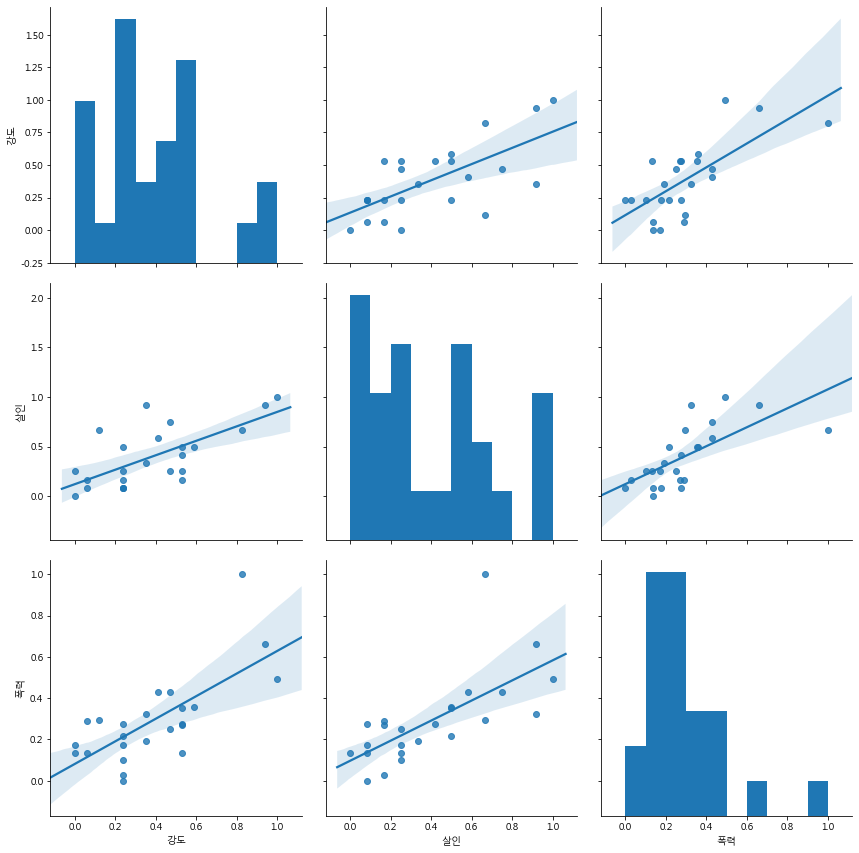

In [68]:
# 강도, 살인, 폭력간의 상관 관계
sns.pairplot(crime_anal_norm, vars=["강도", "살인", "폭력"], size=4, kind="reg") # vars 변수 지정

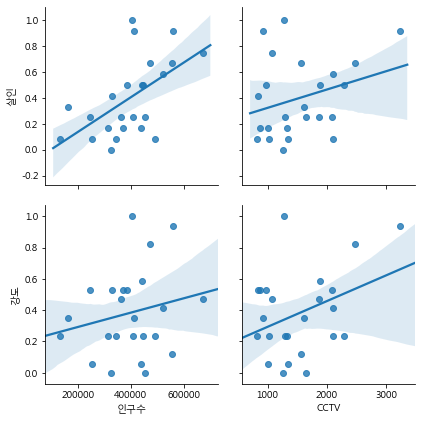

In [70]:
# 인구수와 CCTV개수, 그리고 강도와 살인에 대한 상관관계 
sns.pairplot(crime_anal_norm, x_vars=["인구수", "CCTV"],
             y_vars=["살인", "강도"], size=3, kind="reg")

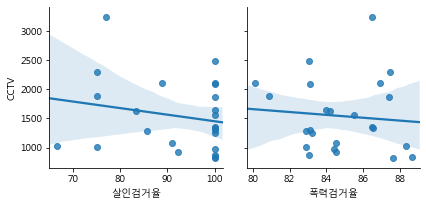

In [73]:
# 살인 및 폭력 검거율과 CCTV의 상관관계
sns.pairplot(crime_anal_norm, x_vars=["살인검거율", "폭력검거율"],
             y_vars=["CCTV"], size=3, kind="reg")

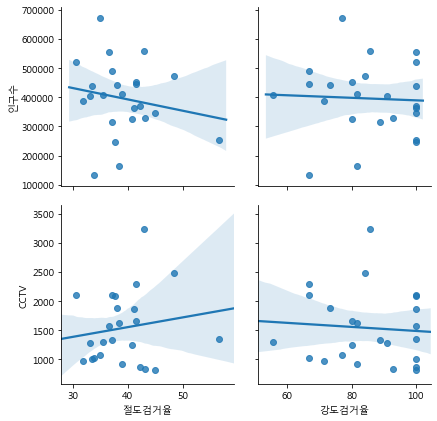

In [76]:
# 절도 및 강도 검거율과 인구수, CCTV의 상관 관계
sns.pairplot(crime_anal_norm, x_vars=["절도검거율", "강도검거율"],
             y_vars=["인구수", "CCTV"], size=3, kind="reg")

Text(0.5, 1, '범죄검거 비율(정규화된 검거의 합으로 정렬)')

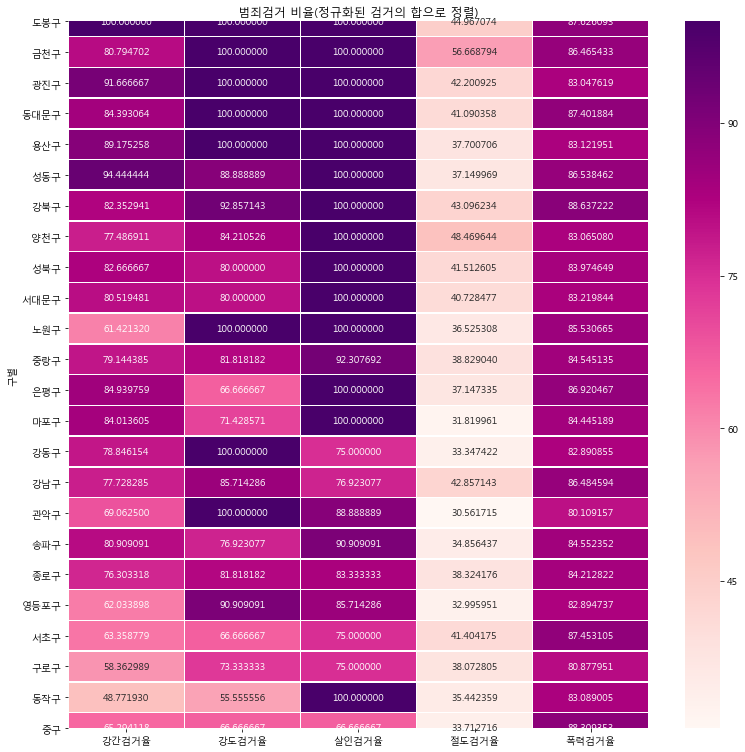

In [90]:
# 히트맵 : 정렬된 결과값을 한번에 쉽게 확인할 수 있게 해주는 그래프
# -----------------------------------------------------------------------

# 지역별 검거율 확인

## "검거" 0-100안으로 숫자 정규화 시키기
tmp_max = crime_anal_norm["검거"].max()
tmp_max
crime_anal_norm["검거"] = crime_anal_norm["검거"]/tmp_max*100
crime_anal_norm

## "검거" 순으로 나열
crime_anal_norm_sort = crime_anal_norm.sort_values(by="검거", ascending=False)
crime_anal_norm_sort

## heatmap으로 그리기
plt.figure(figsize=(13, 13))
sns.heatmap(crime_anal_norm_sort[["강간검거율", "강도검거율", "살인검거율", "절도검거율", 
                                  "폭력검거율"]], annot=True, fmt="f", cmap="RdPu", linewidths=.5) 
    # annot=True:수치값 확인/fmt="f":수치값 실수값으로 설정/cmap="RdPu":색상표현, 높을수록 진하게, 빨강보라/inewidths=.5:셀들의 간격 넓히기
    
## 제목 지정
plt.title("범죄검거 비율(정규화된 검거의 합으로 정렬)")

Text(0.5, 1, '범죄검거 비율(정규화된 발생 건수의 합으로 정렬)')

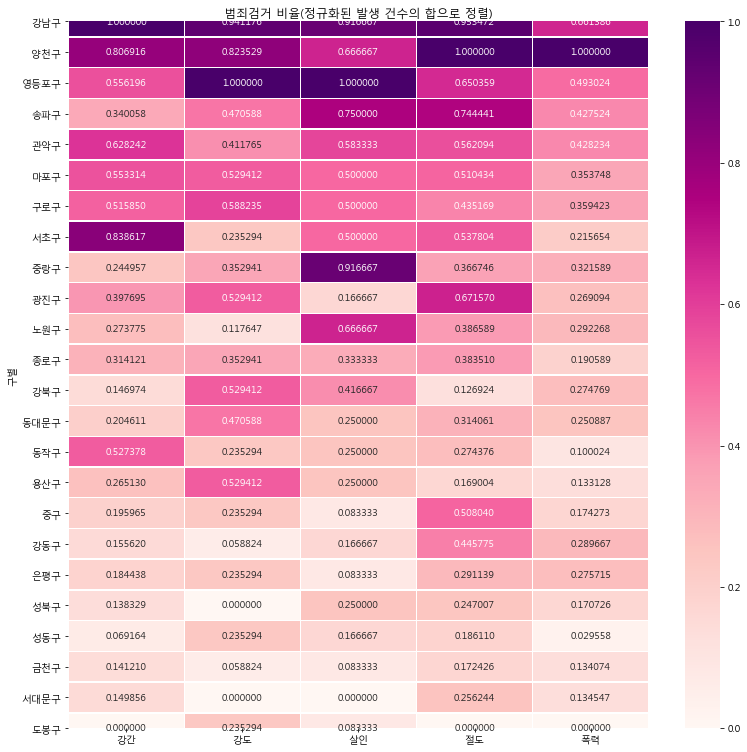

In [93]:
# 발생 건수의 합으로 정렬
col = ["강간", "강도", "살인", "절도", "폭력"]

crime_anal_norm["범죄"] = crime_anal_norm["범죄"] / 5

## "범죄" 순으로 나열
crime_anal_norm_sort = crime_anal_norm.sort_values(by="범죄", ascending=False)
crime_anal_norm_sort.head()

## heatmap으로 그리기
plt.figure(figsize=(13, 13))
sns.heatmap(crime_anal_norm_sort[col], annot=True, fmt="f", cmap="RdPu", linewidths=.5) 
    # annot=True:수치값 확인/fmt="f":수치값 실수값으로 설정/cmap="RdPu":색상표현, 높을수록 진하게, 빨강보라/inewidths=.5:셀들의 간격 넓히기
    
## 제목 지정
plt.title("범죄검거 비율(정규화된 발생 건수의 합으로 정렬)")

In [94]:
# 최종 결과물 저장
crime_anal_norm.to_csv("data/seoul/crime_in_seoul_final.csv")

# 4) 지도 시각화

    https://github.com/southkorea/southkorea-maps/tree/master/kostat/2013/json
    
    채팅방에서 파일 두개 다운받기
    - skorea_municipalities_geo_simple.json
    - skorea_municipalities_geo_simple_seoul.json

In [18]:
# 파일 불러오기
crime_anal_norm = pd.read_csv("data/seoul/crime_in_seoul_final.csv")
crime_anal_norm.set_index("구별", inplace=True)  # 인덱스 지정
crime_anal_norm.head()

,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율,인구수,CCTV,범죄,검거
구별,,,,,,,,,,,,,,
강남구,1.000000,0.941176,0.916667,0.953472,0.661386,77.728285,85.714286,76.923077,42.857143,86.484594,557865,3238,0.035782,85.463066
강동구,0.155620,0.058824,0.166667,0.445775,0.289667,78.846154,100.000000,75.000000,33.347422,82.890855,438225,1010,0.008932,85.550226
강북구,0.146974,0.529412,0.416667,0.126924,0.274769,82.352941,92.857143,100.000000,43.096234,88.637222,327511,831,0.011958,94.070728
관악구,0.628242,0.411765,0.583333,0.562094,0.428234,69.062500,100.000000,88.888889,30.561715,80.109157,522292,2109,0.020909,85.212224
광진구,0.397695,0.529412,0.166667,0.671570,0.269094,91.666667,100.000000,100.000000,42.200925,83.047619,371671,878,0.016276,96.375820


In [19]:
import json 
import folium

geo_path = "data/seoul/skorea_municipalities_geo_simple_seoul.json"

geo_str = json.load(open(geo_path, encoding="utf-8")) # 한글있어서 encoding="utf-8" 해줌
geo_str

map = folium.Map(location=[37.5502, 126.982], zoom_start=11, tiles="Stamen Toner") # tiles="Stamen Toner" : 경계선 위주로
map

map.choropleth(geo_data=geo_str, data=crime_anal_norm["살인"],
              columns=[crime_anal_norm.index, crime_anal_norm["살인"]],
              key_on="feature.id",
              fill_color="PuRd")
map  

# 색이 진할수록 사건 발생이 많이 일어났음을 알 수 있다

C:\Users\acorn\Anaconda3\lib\site-packages\folium\folium.py:415: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  FutureWarning


In [20]:
map = folium.Map(location=[37.5502, 126.982], zoom_start=11) 

map.choropleth(geo_data=geo_str, data=crime_anal_norm["범죄"],
              columns=[crime_anal_norm.index, crime_anal_norm["범죄"]],
              key_on="feature.id",
              fill_color="PuRd")
map  


In [108]:
# 인구 대비 범죄발생 비율

tmp_criminal = crime_anal_norm["살인"]/crime_anal_norm["인구수"]*1000000
tmp_criminal.head()

map = folium.Map(location=[37.5502, 126.982], zoom_start=11) 

map.choropleth(geo_data=geo_str, data=tmp_criminal,
              columns=[crime_anal_norm.index, tmp_criminal],
              key_on="feature.id",
              fill_color="PuRd")
map  


In [123]:
# 경찰서별 검거율과 구별 범죄 발생률을 동시에 시각화하기
crime_anal_raw = pd.read_csv("data/seoul/crime_in_seoul_include_gu_name.csv", index_col=0) # index_col=0 : 따로 인덱스 안붙이고 기존에 있던 column[0]을 인덱스로 사용하겠다.
crime_anal_raw.head()

crime_anal_raw["lat"] = station_lat
crime_anal_raw["lng"] = station_lng

crime_anal_raw.head()

col = ["살인 검거", "강도 검거", "강간 검거", "절도 검거", "폭력 검거"]
tmp = crime_anal_raw[col] / crime_anal_raw[col].max()

crime_anal_raw["검거"] = np.sum(tmp, axis=1)
crime_anal_raw.head()

,관서명,살인 발생,살인 검거,강도 발생,강도 검거,강간 발생,강간 검거,절도 발생,절도 검거,폭력 발생,폭력 검거,구별,lat,lng,검거
0,중부서,2,2,3,2,105,65,1395,477,1355,1170,중구,37.563646,126.989580,1.275416
1,종로서,3,3,6,5,115,98,1070,413,1278,1070,종로구,37.575558,126.984867,1.523847
2,남대문서,1,0,6,4,65,46,1153,382,869,794,중구,37.554758,126.973498,0.907372
3,서대문서,2,2,5,4,154,124,1812,738,2056,1711,서대문구,37.564785,126.966776,1.978299
4,혜화서,3,2,5,4,96,63,1114,424,1015,861,종로구,37.571853,126.998914,1.198382


In [124]:
# 경찰서별 검거율과 구별 범죄 발생률을 동시에 시각화하기
### 경찰서 위치 지도상에 나타내기

map = folium.Map(location=[37.5502, 126.982], zoom_start=11) 

for n in crime_anal_raw.index:
    folium.Marker(location=[crime_anal_raw["lat"][n], crime_anal_raw["lng"][n]], 
                  popup=crime_anal_raw["관서명"][n],
                  icon=folium.Icon(color="red", icon="star")).add_to(map)     
                     #마커 만들기 / 팝업띠우기 / 아이콘 붙여넣기
map

In [126]:
# 경찰서별 검거율과 구별 범죄 발생률을 동시에 시각화하기
### 경찰서의 검거율을 지도 위에 표시하기

map = folium.Map(location=[37.5502, 126.982], zoom_start=11) 

for n in crime_anal_raw.index:
    folium.CircleMarker(location=[crime_anal_raw["lat"][n], crime_anal_raw["lng"][n]], 
                        popup=crime_anal_raw["관서명"][n],
                        radius=crime_anal_raw["검거"][n]*10, 
                        color="#ffffgg", 
                        fill_color="#fffggg").add_to(map)   # radius : 반경 설정 / .add_to : map에 뜨게 설정
    
map

In [128]:
# 경찰서별 검거율과 구별 범죄 발생률을 동시에 시각화하기

map = folium.Map(location=[37.5502, 126.982], zoom_start=11, tiles="Stamen Toner") 

map.choropleth(geo_data=geo_str, data=tmp_criminal,
              columns=[crime_anal_norm.index, tmp_criminal],
              key_on="feature.id",
              fill_color="PuRd")

for n in crime_anal_raw.index:
    folium.CircleMarker(location=[crime_anal_raw["lat"][n], crime_anal_raw["lng"][n]], 
                        popup=crime_anal_raw["관서명"][n],
                        radius=crime_anal_raw["검거"][n]*10, 
                        color="#3186cc", 
                        fill_color="#3186cc").add_to(map)
map
